In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# import pickle
# import numpy as np
# import matplotlib.pyplot as plt
# import pyvista as pv

# fid = open("streamlines.pickle",'rb')
# data = pickle.load(fid)

# frame = data['frame'] 
# flow  = data['flow'] 
# magnitude = data['magnitude']

In [3]:
# data.keys()

In [4]:
# frame = data['frame'] 
# flow  = data['flow'] 
# magnitude = data['magnitude']

# Example

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html

In [45]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
os.add_dll_directory("D://opencvgpu//opencv_build_310//bin")
os.add_dll_directory("C://Program Files//NVIDIA GPU Computing Toolkit//CUDA//v11.8//bin")
sys.path.append('core')

import cv2

fid = open("streamlines.pickle",'rb')
data = pickle.load(fid)

flow  = data['flow'] # a (480, 640, 2) vector field (optical flow)
frame = data['frame'] # a (480, 640, 3) image in bgr format
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # a (480, 640, 3) image in rgb format


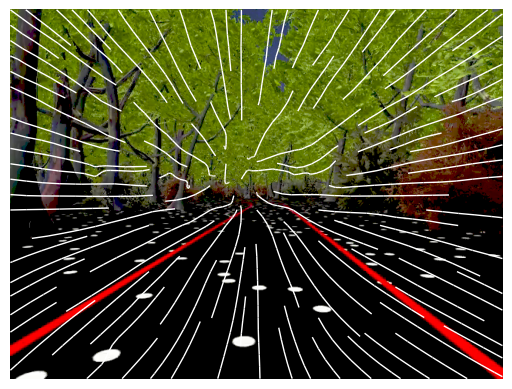

In [46]:

w = int(np.shape(frame)[1])
h = int(np.shape(frame)[0])

x = np.arange(0, np.shape(frame)[0], 1)
y = np.arange(0, np.shape(frame)[1], 1)
grid_x, grid_y = np.meshgrid(y, x)

x = np.arange(0, np.shape(frame)[0], 20)
y = np.arange(0, np.shape(frame)[1], 20)
start_x, start_y = np.meshgrid(y, x)
start_pts = np.array([[y,x] for x in np.arange(0, np.shape(frame)[0], 20) for y in np.arange(0, np.shape(frame)[1], 20) ])

fig, ax = plt.subplots(figsize=(6.4, 4.8), dpi=100)

plt.streamplot(grid_x, grid_y, flow[...,0], flow[...,1], 
               start_points=start_pts, 
               color='w', 
               maxlength = .6,
               arrowsize=0,
               linewidth = 1)

plt.axis('off')
plt.imshow(frame)

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

canvas = FigureCanvas(fig)
canvas.draw()       # draw the canvas, cache the renderer
image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
width, height = fig.get_size_inches() * fig.get_dpi()
image = np.frombuffer(canvas.tostring_rgb(),dtype=np.uint8).reshape(int(height), int(width), 3)
image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

In [47]:
np.shape(image)

(480, 640, 3)

In [44]:
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# fig, ax = plt.subplots()
# print("Dot per inch(DPI) for the figure is: ", fig.dpi)
# bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# width, height = bbox.width, bbox.height
# print("Axis sizes are(in pixels):", width, height)